<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 166.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 186.2 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 167.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 129.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 98.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 166.3 MB/s eta 0:00:00


In [3]:
!pip install seaborn

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [4]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-03-19 10:51:52--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  57.7MB/s    in 2.6s    

2025-03-19 10:51:55 (57.7 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_6  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_7 JobSatPoints_8 JobSatPoints_9 JobSatPoints_10  \
0            NaN            NaN            NaN             NaN   
1            0.0            0.0            0.0             0.0   
2            NaN            NaN            NaN             NaN   
3            NaN            NaN            NaN             NaN   
4            NaN            NaN            NaN             NaN   

  JobSatPoints_11           SurveyLength SurveyEase ConvertedCompYearly JobSat  
0             NaN                    NaN        NaN                 NaN    NaN  
1             0.0                    NaN        NaN                 NaN    NaN  
2             NaN  Appropriate in length       Easy                 NaN    NaN  
3             NaN               Too long       Easy                 NaN    NaN  
4             NaN              Too short       Easy                 NaN    NaN  

[5 rows x 114 columns]

### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



In [5]:
def remove_outliers_iqr(df, column_name):
    """
    Removes outliers from a DataFrame column using the IQR method.
    
    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - column_name (str): The column name to check for outliers.
    >
    Returns:
    - df_cleaned (DataFrame): The DataFrame with outliers removed.
    """
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds to detect outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers: Keep rows where the column value is between the lower and upper bounds
    df_cleaned = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_cleaned

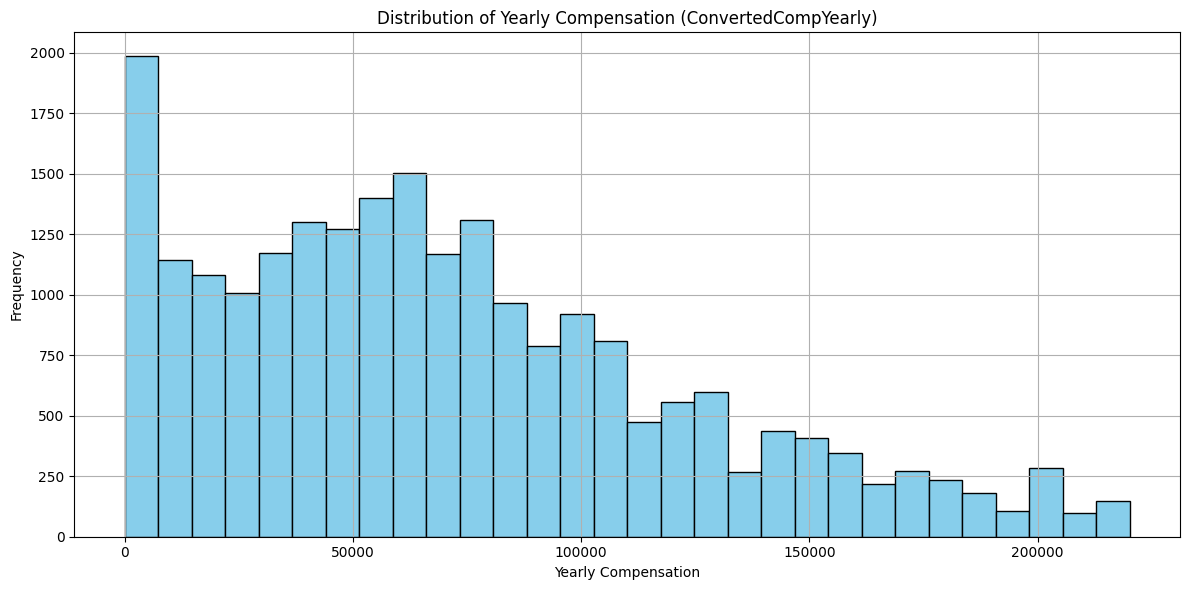

In [6]:
# Drop missing values for the ConvertedCompYearly column
df_cleaned = df.dropna(subset=["ConvertedCompYearly"])

#Removing outliers
df_cleaned = remove_outliers_iqr(df_cleaned,"ConvertedCompYearly")

# Plot a histogram of the ConvertedCompYearly column
plt.figure(figsize=(12, 6))
plt.hist(df_cleaned["ConvertedCompYearly"], bins=30, color='skyblue', edgecolor='black')

# Chart title and labels
plt.title("Distribution of Yearly Compensation (ConvertedCompYearly)")
plt.xlabel("Yearly Compensation")
plt.ylabel("Frequency")

# Show plot
plt.tight_layout()
plt.grid(True)
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



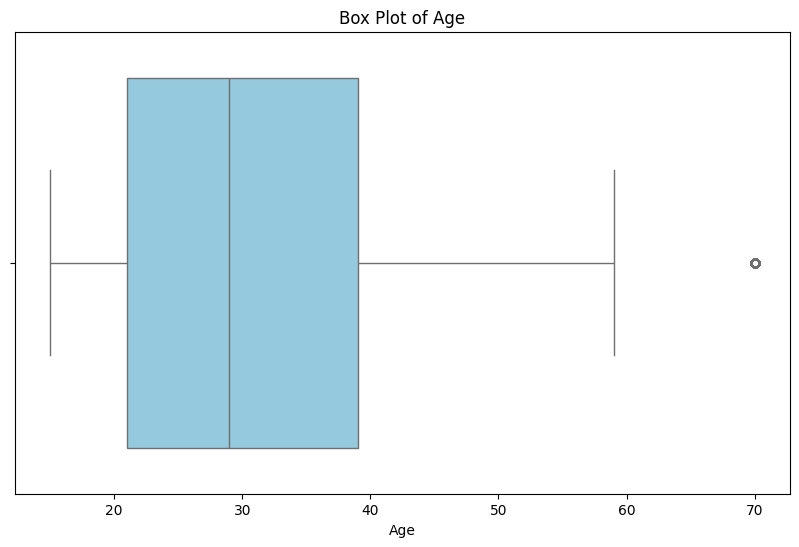

In [7]:

# Map the age groups to their midpoints or representative value
age_mapping = {
    "18-24 years old": 21,
    "25-34 years old": 29,
    "35-44 years old": 39,
    "45-54 years old": 49,
    "55-64 years old": 59,
    "Under 18 years old": 15,  # Assumption: using 15 for under 18 years
    "65 years or older": 70    # Assumption: using 70 for 65+ years
}

# Add a column for the numeric representation of Age
df["AgeNumeric"] = df["Age"].map(age_mapping)

# Plot a box plot for Age
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["AgeNumeric"], color="skyblue")

# Customize the plot
plt.xlabel("Age")
plt.title("Box Plot of Age")

# Show the plot
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



In [8]:
df.head()

ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                                NaN   

                                             EdLevel  \
0                          Primary/elementary school   
1       Bachelor’s degree (B.A., B.S., B.Eng., etc.)   
2    Master’s degree (M.A., M.S., M.Eng., MBA, etc.)   
3  Some college/university study without earning ...   
4  Secondary school (e.g. American high school, G...   

                                           LearnCode  \
0                             Books / Physical media   
1  Books / Physical media;Colleague;On the job tr...   
2  Books / Physical media;Colleague;On the job tr...   
3  Other online resources (e.g., videos, blogs, f...   
4  Other online resources (e.g., videos, blogs, f...   

                                     LearnCodeOnline  ... JobSatPoints_7  \
0                                                NaN  ...            NaN   
1  Technical documentation;Blogs;Books;Written Tu...  ...            0.0   
2  Technical documentation;Blogs;Books;Written Tu...  ...            NaN   
3  Stack Overflow;How-to videos;Interactive tutorial  ...            NaN   
4  Technical documentation;Blogs;Written Tutorial...  ...            NaN   

  JobSatPoints_8 JobSatPoints_9 JobSatPoints_10 JobSatPoints_11  \
0            NaN            NaN             NaN             NaN   
1            0.0            0.0             0.0             0.0   
2            NaN            NaN             NaN             NaN   
3            NaN            NaN             NaN             NaN   
4            NaN            NaN             NaN             NaN   

            SurveyLength SurveyEase ConvertedCompYearly JobSat AgeNumeric  
0                    NaN        NaN                 NaN    NaN       15.0  
1                    NaN        NaN                 NaN    NaN       39.0  
2  Appropriate in length       Easy                 NaN    NaN       49.0  
3               Too long       Easy                 NaN    NaN       21.0  
4              Too short       Easy                 NaN    NaN       21.0  

[5 rows x 115 columns]

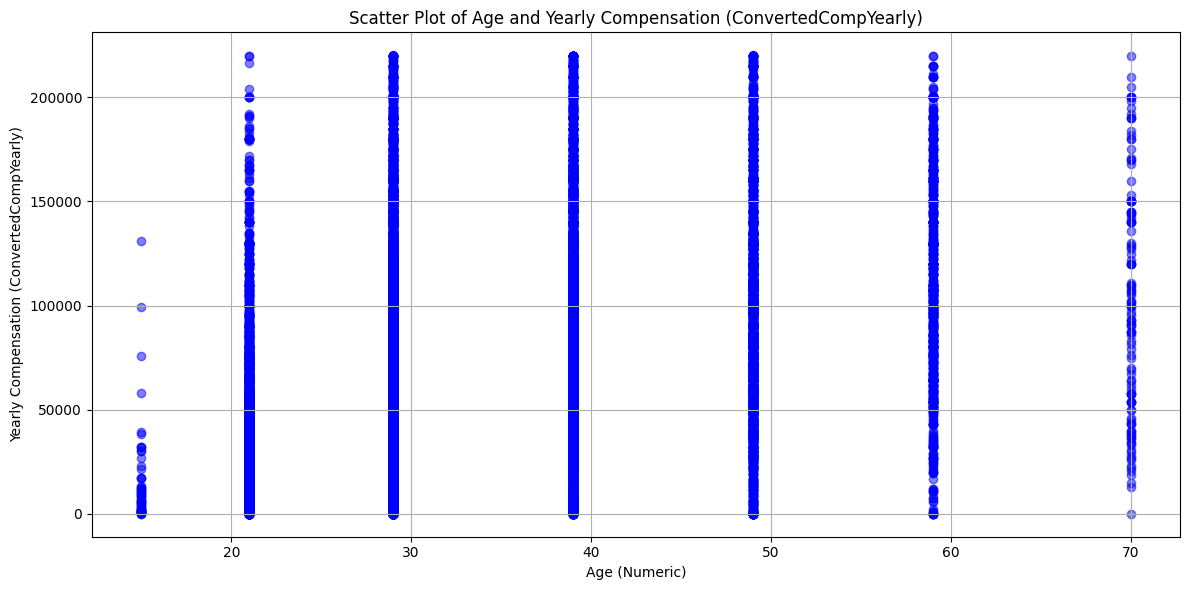

In [9]:
# Drop missing values for Age_numeric and ConvertedCompYearly
df_cleaned = df.dropna(subset=["AgeNumeric", "ConvertedCompYearly"])

#Removing outliers
df_cleaned = remove_outliers_iqr(df_cleaned,"ConvertedCompYearly")

# Plot the scatter plot for Age_numeric vs ConvertedCompYearly
plt.figure(figsize=(12, 6))
plt.scatter(df_cleaned["AgeNumeric"], df_cleaned["ConvertedCompYearly"], alpha=0.5, color='b')

# Chart title and labels
plt.title("Scatter Plot of Age and Yearly Compensation (ConvertedCompYearly)")
plt.xlabel("Age (Numeric)")
plt.ylabel("Yearly Compensation (ConvertedCompYearly)")

# Show plot
plt.tight_layout()
plt.grid(True)
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


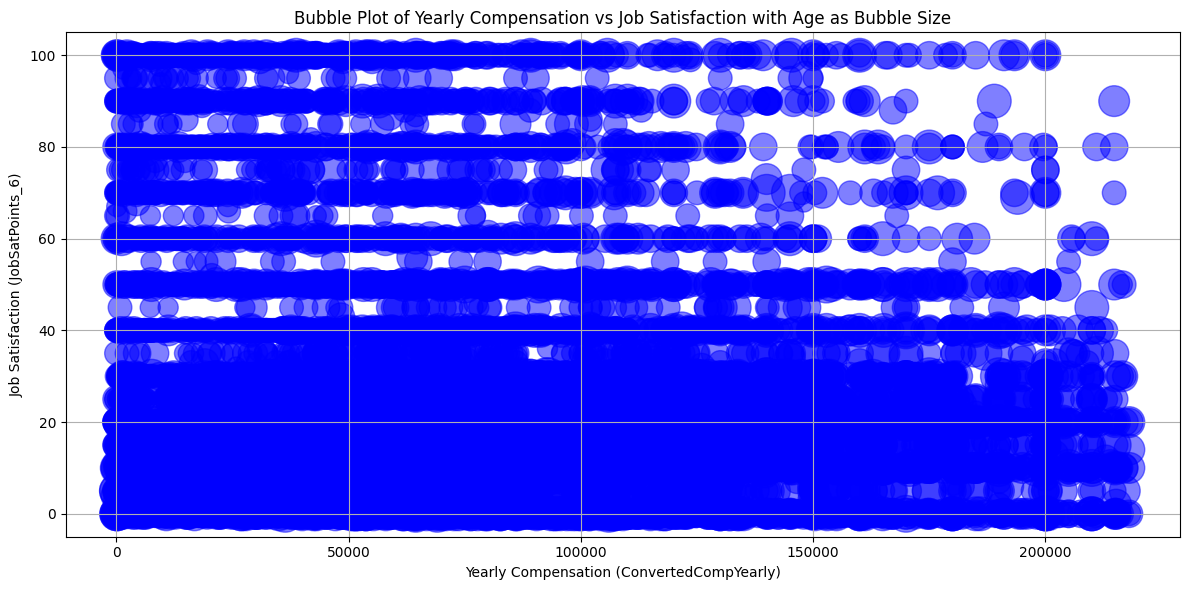

In [10]:

# Drop missing values for the relevant columns (ConvertedCompYearly, JobSatPoints_6, Age_numeric)
df_cleaned = df.dropna(subset=["ConvertedCompYearly", "JobSatPoints_6", "AgeNumeric"])

#Removing outliers
df_cleaned = remove_outliers_iqr(df_cleaned,"ConvertedCompYearly")

# Plot a bubble plot for ConvertedCompYearly vs JobSatPoints_6 with Age_numeric as bubble size
plt.figure(figsize=(12, 6))
plt.scatter(df_cleaned["ConvertedCompYearly"], df_cleaned["JobSatPoints_6"], 
            s=df_cleaned["AgeNumeric"] * 10, alpha=0.5, color='b')

# Chart title and labels
plt.title("Bubble Plot of Yearly Compensation vs Job Satisfaction with Age as Bubble Size")
plt.xlabel("Yearly Compensation (ConvertedCompYearly)")
plt.ylabel("Job Satisfaction (JobSatPoints_6)")

# Show plot
plt.tight_layout()
plt.grid(True)
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



/tmp/ipykernel_301/1492310978.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


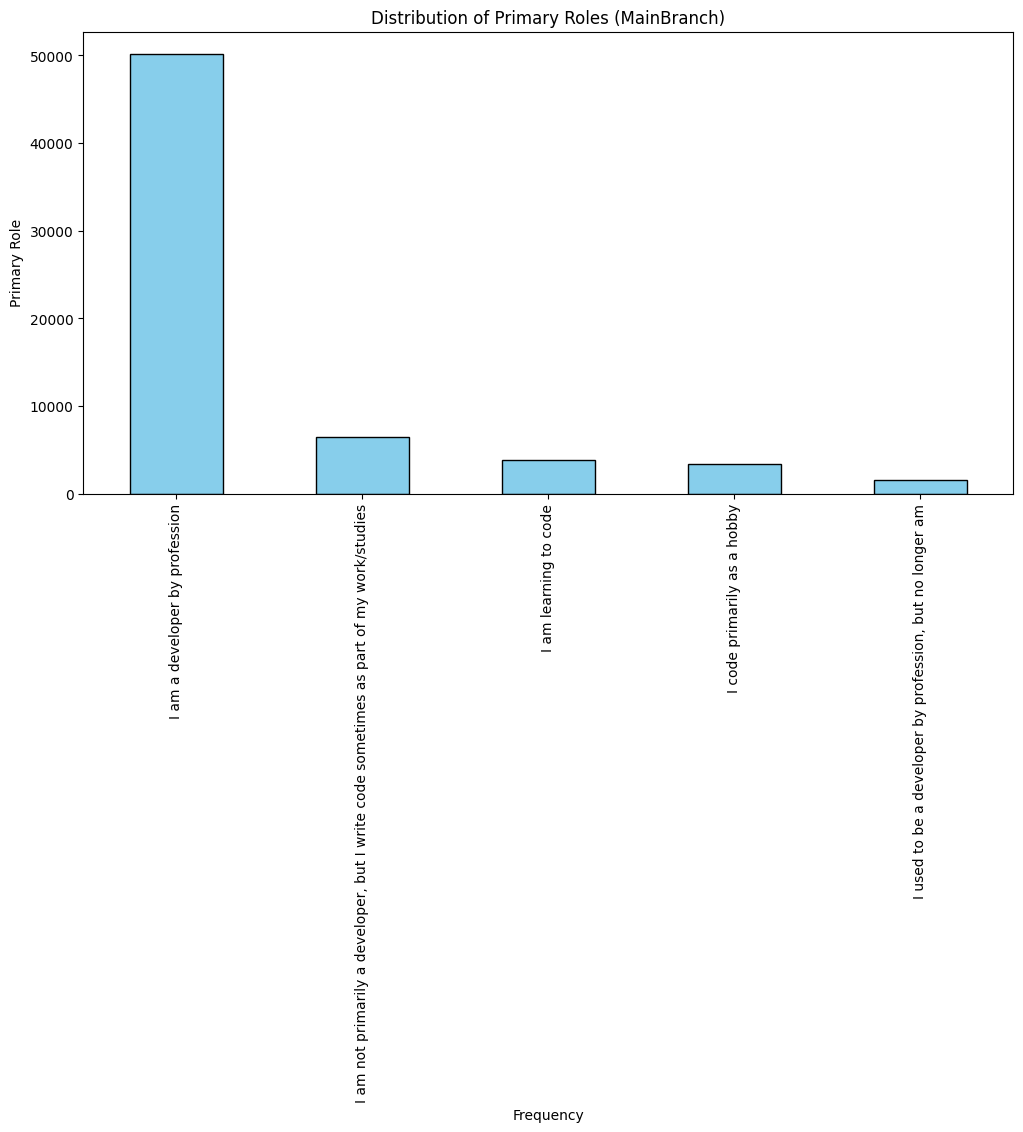

In [11]:
# Count the frequency of each category in the MainBranch column
mainbranch_counts = df["MainBranch"].value_counts()

# Plot the horizontal bar chart
plt.figure(figsize=(12, 6))
mainbranch_counts.plot(kind="bar", color='skyblue', edgecolor='black')

# Chart title and labels
plt.title("Distribution of Primary Roles (MainBranch)")
plt.xlabel("Frequency")
plt.ylabel("Primary Role")

# Show plot
plt.tight_layout()
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



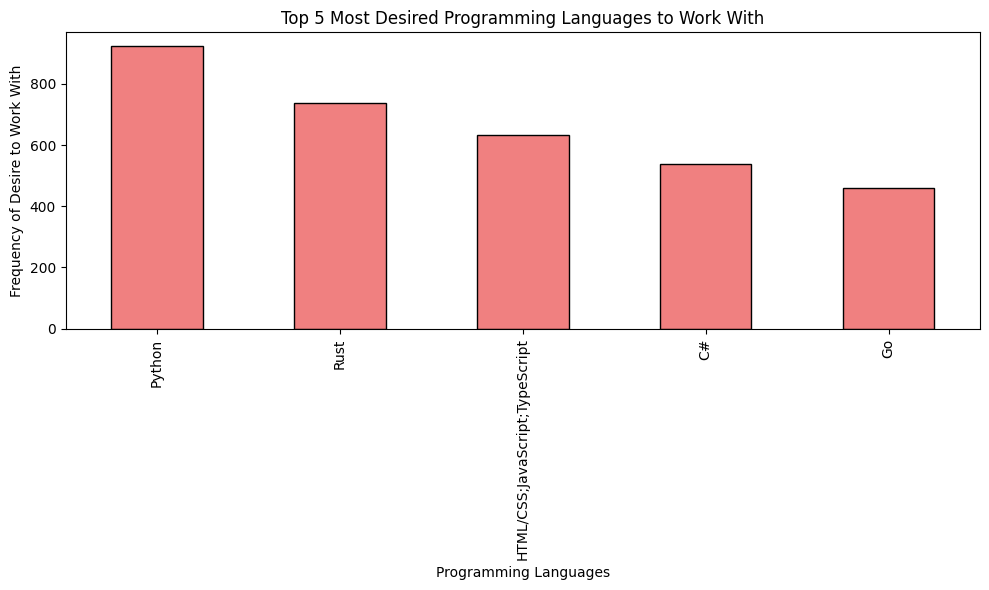

In [12]:
# Count the frequency of each language in the LanguageWantToWorkWith column
language_counts = df["LanguageWantToWorkWith"].value_counts()

# Select the top 5 most desired languages
top_5_languages = language_counts.head(5)

# Plot the vertical bar chart
plt.figure(figsize=(10, 6))
top_5_languages.plot(kind="bar", color='lightcoral', edgecolor='black')

# Chart title and labels
plt.title("Top 5 Most Desired Programming Languages to Work With")
plt.xlabel("Programming Languages")
plt.ylabel("Frequency of Desire to Work With")

# Show plot
plt.tight_layout()
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


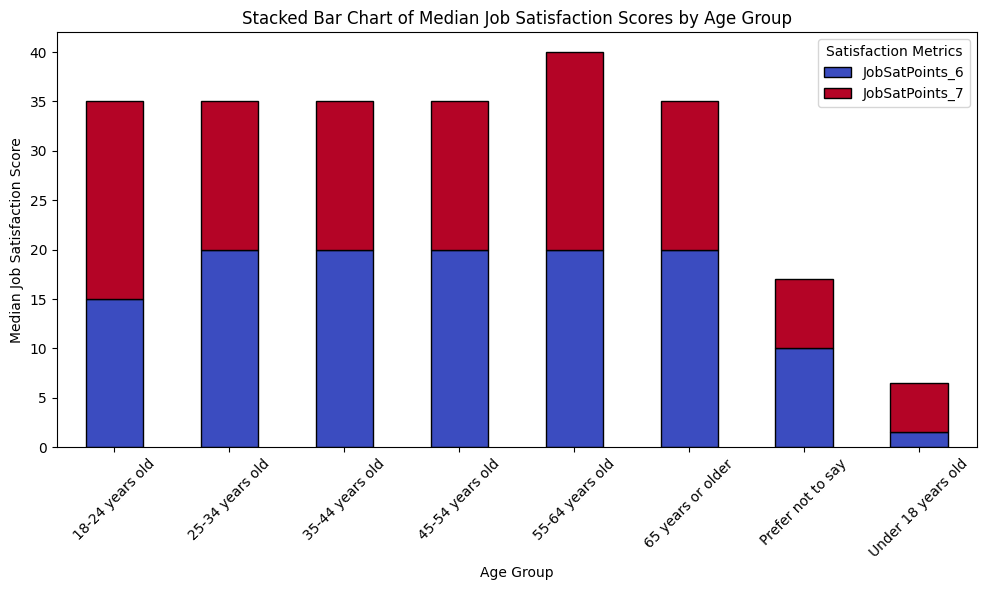

In [13]:
# Drop missing values for relevant columns
df_cleaned = df.dropna(subset=["Age", "JobSatPoints_6", "JobSatPoints_7"])

# Group by Age and compute the median for job satisfaction scores
age_group_median = df_cleaned.groupby("Age")[["JobSatPoints_6", "JobSatPoints_7"]].median()

# Sort Age groups (if they are in a logical order like '18-24', '25-34', etc.)
age_group_median = age_group_median.sort_index()

# Plot the stacked bar chart
ax = age_group_median.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="coolwarm", edgecolor='black')

# Chart title and labels
plt.title("Stacked Bar Chart of Median Job Satisfaction Scores by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Job Satisfaction Score")
plt.xticks(rotation=45)
plt.legend(title="Satisfaction Metrics")

# Show the plot
plt.tight_layout()
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



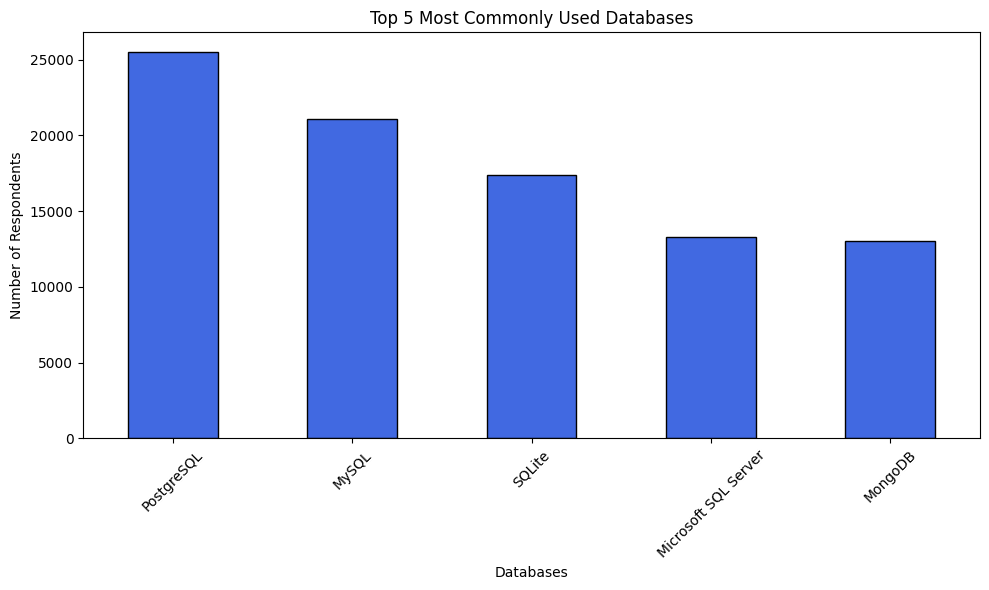

In [15]:
# Drop missing values in the column
df_cleaned = df["DatabaseHaveWorkedWith"].dropna()

# Explode the column to separate multiple databases per respondent
df_exploded = df_cleaned.str.split(';').explode()

# Count occurrences of each database
database_counts = df_exploded.value_counts()

# Select the top 5 most commonly used databases
top_5_databases = database_counts.head(5)

# Plot the vertical bar chart
plt.figure(figsize=(10, 6))
top_5_databases.plot(kind="bar", color='royalblue', edgecolor='black')

# Chart title and labels
plt.title("Top 5 Most Commonly Used Databases")
plt.xlabel("Databases")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



/tmp/ipykernel_301/4263633006.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_group_median, x="Age", y="ConvertedCompYearly", palette="coolwarm", edgecolor="black")


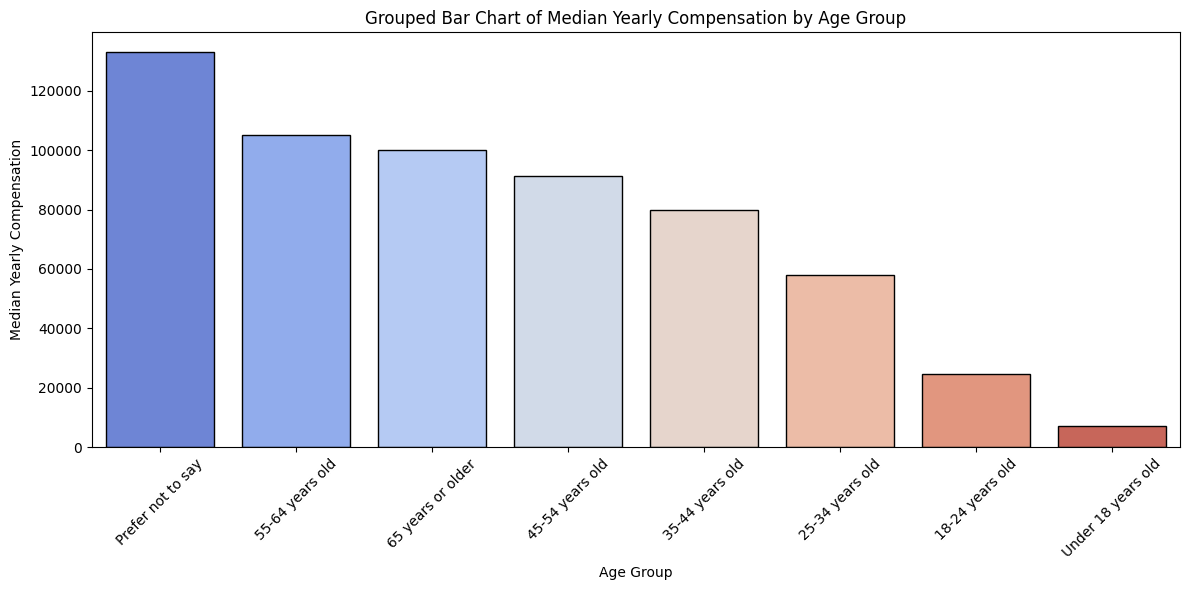

In [16]:
# Drop missing values in relevant columns
df_cleaned = df.dropna(subset=["Age", "ConvertedCompYearly"])

df_cleaned = remove_outliers_iqr(df_cleaned, "ConvertedCompYearly")

# Group by Age and calculate the median compensation
age_group_median = df_cleaned.groupby("Age")["ConvertedCompYearly"].median().reset_index()

# Sort Age groups logically if needed
age_group_median = age_group_median.sort_values(by="ConvertedCompYearly", ascending=False)

# Plot grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=age_group_median, x="Age", y="ConvertedCompYearly", palette="coolwarm", edgecolor="black")

# Chart title and labels
plt.title("Grouped Bar Chart of Median Yearly Compensation by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Yearly Compensation")
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



/tmp/ipykernel_301/3154449134.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")


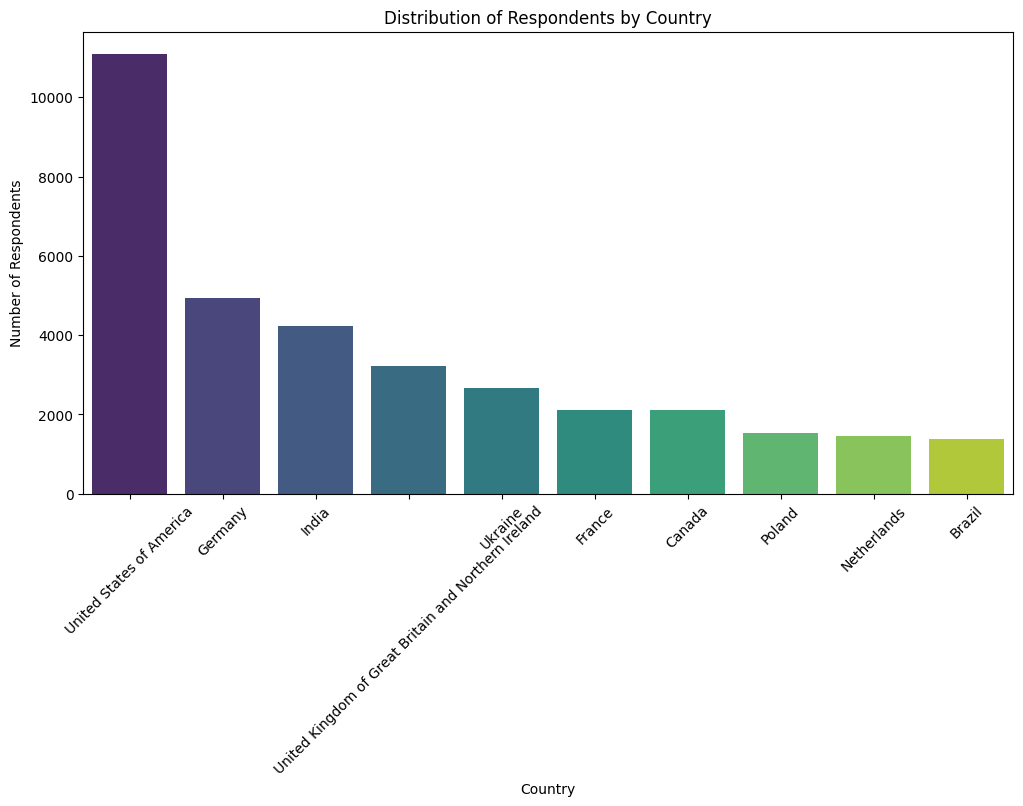

In [18]:
# Count respondents per country
country_counts = df['Country'].value_counts()

# Select the top 10 countries (modify as needed)
top_countries = country_counts.head(10)

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="viridis")

# Add labels and title
plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.title("Distribution of Respondents by Country")
plt.xticks(rotation=45)

# Show plot
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
